Sveučilište u Zagrebu<br/>
Fakultet elektrotehnike i računarstva<br/>
Zavod za elektroničke sustave i obradbu informacija

Akademska školska godina 2022./2023.

**4. vježba: Dizajn FIR filtara**

*Osnove obradbe signala* (183447, 223374)

Autor: Tomislav Petković

Prijevod s engleskog jezika: Domagoj Zoraja

Datum: 2022-10-05

Molimo vas da komentare na ove upute (ispravke, primjedbe, prijedloge itd.) šaljete e-poštom na tomislav.petkovic.jr@fer.hr.

© Sveučilište u Zagrebu Fakultet elektrotehnike i računarstva, 2022.

Umnažanje i distribucija ovih uputa je dozvoljena samo ako svaka kopija sadrži gorenavedenu informaciju o autorskim pravima te ovu dozvolu o umnažanju.

# Uvod

Upute za četvrtu laboratorijsku vježbu iz predmeta *Osnove obradbe signala* su pripremljene u obliku <a href="https://jupyter.org/">Jupyterske</a> bilježnice.

Jupyterska bilježnica koristi <a href="https://ipython.org/">IPython</a> koji je interaktivni interpreter za Pyhton. Jupytersku bilježnicu možete pokrenuti lokalno, no isto tako je možete pokrenuti udaljeno na Googleovom Colaboratoryu.

Svi zadaci u ovoj bilježnici su dovoljno jednostavni tako da se mogu bez problema riješiti korištenjem <a href="https://colab.research.google.com">Googleovog Colaboratorya</a> (skraćeno Colab).

Svaki softver je samo alat. Sukaldno tome, osim Pythona slobodno smijete koristiti i druge alate kao što su <a href="https://www.mathworks.com/products/matlab.html">Matlab</a>, <a href="https://www.gnu.org/software/octave/index">GNU Octave</a> i <a href="https://www.scilab.org/">Scilab</a> kako bi riješili zadane zadatke. Napominjemo da korištenje drugih alata može značiti da vaš izvještaj s vježbe ne možete predati popunjavanjem ove bilježnice, odnosno da morate pripremiti novi pisani izvještaj. Dodatno, nastavnici vam mogu pomoći oko izrade vježbe samo ako koristite Colab i/ili Matlab.

## Upute za predaju izvještaja s vježbe

Ako rješavate vježbu u Pythonu korištenjem Colaba onda jednostavn upišite vaše odgovore u prazna polja, i to programski kod u polja za kod te odgovore na postavljena pitanja u tekstualna polja.

Prazna polja u koja upisujete programski kod sadrže zadani komentar: `# Upišite vaše rješenje`.

Tekstualna polja u koja morate upisati odgovore na postavljena pitanja sadrže masni tekst napisan velikim tiskanim slovima: **UPIŠITE VAŠ ODGOVOR**.

Jednom kada su svi zadaci riješeni ispunjenu bilježnicu pohranite u datoteku s imenom `JMBAG_IME_PREZIME_Vjezba_4.ipynb` te tu datoteku predajte pod odgovarajuću zadaću u FER-ovom Moodleu.

Predane bilježnice mogu biti automatski re-evaluirane što odgovara naredbi  *Restart and run all* u Colabu. Prema tome, svakako prije predaje vaše bilježnice pokrenite tu naredbu i provjerite ispravnost vaših rješenja.

Ako ste vježbu izradili korištenjem nekog drugog softvera koji nije kompatibilan s Jupyterskom bilježnicom onda morate pripremiti standardni pisani izvještaj s laboratorijske vježbe.

## Podaci o studentu

Molimo vas da prije ispunjavanja ostatka bilježnice dvaput kliknete na ovaj tekst te zatim upište vaše podatke:

Ime: **IMARKO HARALOVIĆ**

Matični broj (JMBAG): **0036538058**

Također odmah promijenite ime datoteke u JMBAG_IME_PREZIME.ipynb.

## Uvoz potrebnih funkcija

Radi smanjivanja razlika između programskog koda u Pythonu i u Matlabu u ovoj bilježnici ćemo namjerno uvesti sve potrebne funkcije iz <a href="https://www.scipy.org/">SciPy</a>-ja, <a href="https://numpy.org/">NumPy</a>-ja i <a href="https://matplotlib.org/">Matplotlib</a>-a izravno u globalni imenik tako da možemo jednostavno pisati `fft` umjesto punog imena `scipy.fft.fft`.

Svakako imajte u vidu da je ovakav pristup uvjetno prihvatljiv radi pojednostavljenja koda za laboratorijske vježbe jer su rizici kolizije i neočekivanih nuspojava minimalni. **Uvoz funkcija u globalni imenik se ne koristi u produkcijskom kodu.**

Ako preferirate korištenje imenika i punih imena funkcija onda slobodno izmijenite naredbe za uvoz funkcija tako da sve uvezene funkcije ostanu strogo razdvojene.

In [70]:
# Uvezi potrebne funkcije u globalni imenik
from scipy.signal import *
from scipy.fft import *
from numpy import *
from matplotlib.pyplot import *

# 1. Dizajn FIR filtara

U ovoj laboratorijskoj vježbi istražujemo kako uz pomoć računala možemo odrediti koeficijente prijenosne funkcije digitalnog filtra koje zadovoljavaju zadanu filtarsku specifikaciju. Tu zadaću pronalaženja filtarskih koeficijenata nazivamo računalnom podržani dizajn filtara. 

Glavni problem kod dizajniranja filtra jest određivanje koeficijenata prijenosne funkcije

$$
H(z) = {B(z) \over A(z)} = {\displaystyle\sum_{j=0}^{M}b_jz^{-j} \over \displaystyle 1 + \sum_{i=1}^{N}a_iz^{-i}} = {b_0 + b_1z^{-1} + b_2z^{-2} + \cdots + b_{M}z^{-M} \over 1 + a_1z^{-1} + a_2z^{-2} + \cdots + a_Nz^{-N}}
$$

takvih da frekvencijska karakteristika filtra $H(e^{j\omega})$ dobro aproksimira neku željenu frekvecnijsku karakteristiku $D(\omega)$.

Dodatno ograničenje kojeg prijenosna funkcija mora zadovoljiti jest da se njeni svi polovi $p_k$, $k=1,\ldots,N$ (koji su nultočke polinoma $A(z)$ u nazivniku) moraju nalaziti unutar jednične kružnice, dakle mora vrijediti $|p_k|<1, k=1,\ldots,N$, odnosno filtar mora biti stabilan.

Drugim riječima rečeno, prijenosna funkcija $H(z)$ digitalnog filtra kojeg dizajniramo nije proizvoljna funkcija; ona mora biti **ostvariva** što znači da $H(z)$ mora opisivati linearan i vremenski nepromjenjiv (LTI) sustav koji je i **kauzalan** i **stabilan**.

Kauzalnost sustava je osigurana odabranim oblikom prijenosne funkcije $H(z)$ gdje su svi eksponenti varijable $z$ negativni. Prisjetite se da ne-pozitivne potencije od $z$ odgovaraju trenutnim ili zakašnjelim uzorcima ulaznog ili izlaznog signala u diferencijskoj jednadžbi koja opisuju filtar, pa je to nužni uvjet kojeg moramo ispuniti za kauzalnost.

Uvjet za stabilnost sustava se nažalost ne može izravno iskazati preko koeficijenata prijenosne funckije $a_i$ jer se nultočke polinoma četvrtog ili višeg reda/stupnja ne mogu izraziti u radikalima. Prema tome stabilnost sustava se mora ili provjeravati neizravno ili se prijenosna funkcija mora iskazati preko svojih nula, polova i pojačanja (engl. *zero-pole-gain*, još se koristi i kratica ZPK gdje K označava konstantu koja definira pojačanje).

U ovoj laboratorijskoj vježbi proučavamo kako dizajnirati FIR filtre za koje je polinom $A(z)$ u nazivniku trivijalan, odnosno vrijedi $A(z)=1$. U tom slučaj prijenosna funckija filtra $H(z)$ postaje

$$H(z)=B(z)=\sum_{j=0}^{M}b_jz^{-j}=b_0+b_1z^{-1}+b_2z^{-2}+\cdots+b_{M}z^{-M}.$$

Prijenosne funkcije takvog oblika nemaju polove koji nisu trivijalni što čini pripradne filtre uvijek **stabilnima** i što značajno olakšava dizajn filtra. Trivijalni polovi su polovi koji se nalaze u ishodištu ($z=0$) i koji ne utječu niti na stabilnost niti na amplitudno-frekvencijsku karakteristiku.

Primjenom inverzne Z-transformacije na prijenosnu funkciju $H(z)$ dobivamo impulsni odziv filtra $h[n]$. U slučaju FIR filtara taj postupak je trivijalan. Izraz $H(z)=\sum_{j=0}^{M}b_jz^{-j}$ odgovara upravo definicijskom izrazu za Z transformaciju pa odmah dobivamo impulsni odziv 

$$h[n]=\sum_{j=0}^{M}b_j\delta[n-j]=\bigl\{\underline{b_0},b_1,b_2,\ldots,b_M\bigr\}.$$

Dobiveni $h[n]$ je **konačnog** trajanja i to je razlog zašto sve takve filtre nazivamo filtrima s konačnim impulsnim odzivom ili **FIR** filtrima prema engl. **F**inite **I**mpulse **R**esponse.

Druga kratica za FIR filtar je **MA** filtar, od engl. **M**oving **A**verage, jer se postupak filtracije efektivno svodi na težinsko usrednjavanje zadnjih $M$ uzoraka ulaznog signala.

## 1.1. Zadaća dizajniranja FIR filtra

U zadaći dizajniranja digitalnog filtra gotovo uvijek započinjemo s zadanom **željenom frekvencijskom karakteristikom** $D(\omega)$.

Zadaća dizajniranja FIR filtra se svodi na određivanje koeficijenata $b_j$, $j=1,\ldots,M$ prijenosne funckije $H(z)$ takvih da frekvencijska karakteristika LTI sustava

$$H(e^{j\omega})=\sum_{m=0}^{M}b_me^{-jm\omega}=b_0+b_1e^{-j\omega}+b_2e^{-2j\omega}+\cdots+b_{M}e^{-jM\omega}$$

bude **dovoljno dobra aproksimacija** željene frekvencijske karakteristike $D(\omega)$.

Opisanu zadaću rješavamo uvođenjem funkcije greške (koju još nazivamo i funkcija cijene ili funkcija udaljenosti) koja mjeri kvalitetu našeg rješenja. Uvođenjem funkcije greške zadaću dizajna filtra pretvaramo u klasičan minimizacijski problem. 

Standradna funkcija greške koja se koristi za dizajniranje filtara jest **p**-norma razlike $D(\omega)$ i $H(e^{j\omega})$, odnosno želimo minimizirati izraz

$$E=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_p=\sqrt[p]{\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^p\,d\omega}.$$

U navedenom izrazu za grešku $E$ poznati parametri su željena frekvencijska karakteristika $D(\omega)$ i parametar $p$ koji određuje normu. Nepoznati parametri su red filtra $M$ i koeficijenti $b_i$, $i=1,\ldots,M$, i njih moramo odrediti.

Razmotrimo prvo red filtra $M$. Primijetite da bi povećanje reda filtra $M$ uvijek trebalo uzrokovati smanjenje greške $E$, odnosno viši red $M$ daje manju grešku $E$. Ako uzmemo $M\to+\infty$ tada očekivano dobivamo najbolju moguću aproksimaciju. Međutim, red filtra $M$ također određuje broj računskih operacija (množenja i zbrajanja) koje su potrebne za računanje jednog uzorka izlaznog signala. Prema tome želimo što manji red filtra $M$ kako bi smanjili ukupni trošak računskih operacija, no istodobno želimo i što je moguće manju vrijednost greške $E$. Drugim riječima rečeno tražimo najmanji red filtra $M$ za kojeg je greška $E$ unutar dozvoljenih granica.

U praksi je zadana željena frekvencijska karakteristika $D(\omega)$ proširna  specificiranjem prihvatljivih granica ostvarene aproksimacijske greške. Željena frekvencijska karakterisitka $D(\omega)$ zajedno s prihvatljivim granicama aproksimacijske greške predstavlja **filtarsku specifikaciju**.

Uz zadanu filtarsku specifikaciju zadaća dizajna filtra se uobičajeno rješava u sljedećim koracima:

1. procjeni (ili slučajno odaberi) početni reda filtra $M$;
2. za zadani red filtra $M$ numerički riješi minimizacijski problem i odredi vrijednosti koeficijenta $b_i$;
3. provjeri zadovoljava li dobiveni $H(e^{j\omega})$ zadanu specifikaciju filtra; i
4. ako je filtarska specifikacija zadovoljena onda je filtar uspješno dizajniran, a u suprotnom povećaj red fltra $M$ i vrati se na drugi korak.

Problem numeričke minimizacije funkcije greške iz drugog koraka za odabrani $p$ je rješiv u slučajevima kada je $p=2$ (analitičko rješenje u zatvorenoj formi) i kada je $p\to+\infty$ (brzo-konvergirajuće iterativno rješenje).

Za $p=2$ govorimo o dizajnu filtra optimalnog u smislu **kvadratne pogreške** ili u smislu **najmanjih kvadrata** (engl. *least-squares design*, kratica LS).

Za $p\to+\infty$ govorimo o dizajnu filtra optimalnog u smislu najvećeg odstupanja ili o minimaks filtru (engl. *minimax design*).


## 1.2. Dizajniranje FIR filtara linearne faze

Zadana željena frekvencijska karakterisitka $D(\omega)$ može se rastaviti na amplitudni dio i na fazni dio.

Amplitudni dio frekvencijske karakteristike $D(\omega)$ naziva se **amplitudno-frekvencijska karakterisitka**,

$$A_D(\omega)=\bigl|D(\omega)\bigr|,$$

dok se fazni dio frekvencijske karakteristike $D(\omega)$ naziva **fazno-frekvencijska karakteristika**,

$$\phi_D(\omega)=\angle D(\omega).$$

Kod filtriranja često želimo mijenjati samo amplitudu pojedinih komponenti signala bez mijenjanja njihove faze. Taj zahtjev da filtar utječe samo na amplitudu postavlja ogrnaičenja na željenu fazno-frekvencijsku karakteristiku. Preciznije, željena fazna karakteristika $\angle D(\omega)$ mora biti afina funkcija od $\omega$ (pravac), dakle mora vrijediti

$$\angle D(\omega)=a+b\omega,$$

gdje su $a$ i $b$ realni brojevi.

LTI sustave ili filtre čija fazna karakteristika je opisana gore navedenom jednadžbom nazivamo sustavima s **generaliziranom linearnom fazom**. Glavna prednost takvih filtara je da ne unose **fazna izobličenja**.

Možemo pokazati da se taj uvjet **generalizirane linearne faze** koji je iskazan u frekvencijskoj domeni transformira u uvjet **simetričnost** ili **antisimetričnosti** impulsnog odziva u vremenskoj domeni. Prema tome impulsni odziv svakog filtra generalizirane linearne faze mora imati točku oko koje je ili simetričan ili antisimetričan.

Impulsni odziv FIR filtra reda $M$ je

$$h[n]=\sum_{j=0}^{M}b_j\delta[n-j]=\bigl\{\underline{b_0},b_1,b_2,\ldots,b_M\bigr\}$$

i ima konačno trajanje. Kako je impulsni odziv konačan jednostavno je napisati koja ograničenja moraju zadovoljiti koeficijenti $b_j$ ako želimo da impulsni odziv bude ili simetričan ili antisimetričan. Za simetričan impulsni odziv mora biti

$$h[n]=h[M-n]$$

ili

$$b_n=b_{M-n},$$

a za antisimetričan impulsni odziv mora biti
 
$$h[n]=-h[M-n]$$

ili

$$b_n=-b_{M-n},$$ 

i to za sve $0\le n\le M$. Ovisno o parnosti reda filtra $M$ centar simetrije ili antisimetrije impulsnog odziva se nalazi ili točno na mjestu središnjeg uzorka ili između dva susjedna uzorka oko središta impulsnog odziva.

Obzirom na izbor simetrije/antisimetrije i izbor parnosti reda filtra (koji odgovoara izboru položaj centra simetrije/antisimetrije na uzorak/između uzoraka) postoje ukupno četiri tipa FIR filtara generalizirane linearne faze. To su:

1. parni red filtra sa simetričnim impulsnim odzivom ili tip I,
2. neparni red filtra sa simetričnim impulsnim odzivom ili tip II,
3. parni red filtra sa antisimetričnim impuslnim odzivom ili tip III, i
4. neparni red filtra sa antisimetričnim impulsnim odzivom ili tip IV.

### 1.2.1. Filtar tipa I

Filtar tipa I je parnog reda $M$ i ima točku simetrije u $M/2$ što je točno na mjestu središnjeg uzorka impulsnog odziva.

Impulsni odziv filtra sadrži točno $L=M+1$ uzoraka, odnosno broj uzoraka impulsnog odziva je neparan.

**Primijetite da su parnosti reda filtra $M$ i duljine impulsnog odziva $L$ uvijek različite.**

Impulsni odziv filtra tipa I za $0\le n\le M$ zadovoljava uvjet simetrije

$$h[n]=h[M-n].$$


&nbsp;

Jedan primjer impulsnog odziva filtra šestog reda ($M=6$) jest:

\begin{align}
h[n]=\sum_{j=0}^{6}b_j\delta[n-j]
&=\bigl\{\underline{b_0},b_1,b_2,b_3,b_4,b_5,b_6\bigr\}\\
&=\bigl\{\underline{b_0},b_1,b_2,b_3,b_2,b_1,b_0\bigr\}.
\end{align}

Prema uvjetu simetrije vrijedi

\begin{align}
h[0]&=b_0=b_6=h[6-0]=h[6]\\
h[1]&=b_1=b_5=h[6-1]=h[5]\\
h[2]&=b_2=b_4=h[6-2]=h[4]\\
h[3]&=b_3=b_3=h[6-3]=h[3]\\
\end{align}

pa je centar simetrije točno na uzorku $b_3$ koji je jednak samom sebi.

Frekvencijska karakteristika filtra tipa I je uvijek oblika

$$
H(e^{j\omega})=e^{-jM\omega/2}\Bigl(h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\Bigr).
$$

Filtar tipa I jest **univerzalan**, i to u smislu da navedenim kosinusnim redom možemo aproksimirati bilo koju željenu amplitudnu karakteristiku $|D(\omega)|$ nekog sustava s realnim impulsnim odzivom.

Prema tome filtrom tipa I možemo ostvariti sve klasične vrste amplitudno selektivnih filtara, nisko-propusni (NP) filtar, visoko-propusni (VP) filtar, pojasno-propusni (PP) filtar, i pojasnu branu (PB), i zato je on najčešći u praksi.

### 1.2.2. Filtar tipa II

Filtar tipa II je neparnog reda $M$ i ima točku simetrije u $M/2$ što je točno između dva uzorka najbliža središtu impulsnog odziva.

Impulsni odziv filtra sadrži točno $L=M+1$ uzoraka, odnosno broj uzoraka impulsnog odziva je paran.

Impulsni odziv filtra tipa II za $0\le n\le M$ zadovoljava uvjet simetrije

$$h[n]=h[M-n].$$

&nbsp;

Jedan primjer impulsnog odziva filtra sedmog reda ($M=7$) jest

\begin{align}
h[n]=\sum_{j=0}^{7}b_j\delta[n-j]
&=\bigl\{\underline{b_0},b_1,b_2,b_3,b_4,b_5,b_6,b_7\bigr\}\\
&=\bigl\{\underline{b_0},b_1,b_2,b_3,b_3,b_2,b_1,b_0\bigr\}.
\end{align}

Prema uvjetu simetrije vrijedi

\begin{align}
h[0]&=b_0=b_7=h[7-0]=h[7]\\
h[1]&=b_1=b_6=h[7-1]=h[6]\\
h[2]&=b_2=b_5=h[7-2]=h[5]\\
h[3]&=b_3=b_4=h[7-3]=h[4]\\
\end{align}

pa je centar simetrije točno na polovištu između dva susjedna identična uzorka odziva $b_3$ i $b_4$.

Frekvencijska karakterisitka filtra tipa II je uvijek oblika

$$
H(e^{j\omega})=e^{-jM\omega/2}\Bigl(\sum_{m=1}^{(M+1)/2}2h\bigl[{\textstyle {M+1\over 2}}-m\bigr]\cos\bigr(\omega (m-{\textstyle {1\over 2}})\bigr)\Bigr).
$$

Primijetite da za $\omega=\pi$ uvijek vrijedi $H(e^{j\pi})=H(-1)=0$.

Prema tome filtar tipa II ne možemo koristiti ako dizajniramo visoko-propusne (VP) filtre i pojasne brane (PB).

### 1.2.3. Filtar tipa III

Filtar tipa III je parnog reda $M$ i ima točku antisimetrije u $M/2$ što je točno na mjestu središnjeg uzorka impulsnog odziva.

Impulsni odziv filtra sadrži točno $L=M+1$ uzoraka, odnosno broj uzoraka impulsnog odziva je neparan.

Impulsni odziv filtra tipa III za $0\le n\le M$ zadovoljava uvjet antisimetrije

$$h[n]=-h[M-n].$$

&nbsp;

Jedan primjer impulsnog odziva filtra šestog reda ($M=6$) jest

\begin{align}
h[n]=\sum_{j=0}^{6}b_j\delta[n-j]
&=\bigl\{\underline{b_0},b_1,b_2,b_3,b_4,b_5,b_6\bigr\}\\
&=\bigl\{\underline{b_0},b_1,b_2,0,-b_2,-b_1,-b_0\bigr\}.
\end{align}

Prema uvjetu antisimetrije vrijedi

\begin{align}
h[0]&=b_0=-b_6=-h[6-0]=h[6]\\
h[1]&=b_1=-b_5=-h[6-1]=h[5]\\
h[2]&=b_2=-b_4=-h[6-2]=h[4]\\
h[3]&=b_3=-b_3=-h[6-3]=h[3]=0\\
\end{align}

pa je centar antisimetrije točno na uzorku $b_3=0$ koji mora biti jednak nuli jer jedino za nulu vrijedi $x=-x$. 

Frekvencijska karakteristika filtra tipa III je uvijek oblika

$$
H(e^{j\omega})=e^{-j(M\omega-\pi)/2}\Bigl(\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\sin(\omega m)\Bigr).
$$

Primijetite da za $\omega=0$ uvijek vrijedi $H(e^{j0})=H(1)=0$ i da za $\omega=\pi$ uvijek vrijedi $H(e^{j\pi})=H(-1)=0$.

Prema tome filtar tipa III ne možemo koristiti ako dizajniramo nisko-propusne (NP) filtre, visoko-propusne (VP) filtre i pojasne brane (PB).


### 1.2.4. Filtar tipa IV

Filtar tipa IV je neparnog reda $M$ i ima točku antisimetrije u $M/2$ što je točno između dva uzorka najbliža središtu impulsnog odziva.

Impulsni odziv filtra sadrži točno $L=M+1$ uzoraka, odnosno broj uzoraka impulsnog odziva je paran.

Impulsni odziv filtra tipa IV za $0\le n\le M$ zadovoljava uvjet antisimetrije

$$h[n]=-h[M-n].$$

&nbsp;

Jedan primjer impulsnog odziva filtra sedmog reda ($M=7$) jest:

\begin{align}
h[n]=\sum_{j=0}^{7}b_j\delta[n-j]
&=\bigl\{\underline{b_0},b_1,b_2,b_3,b_4,b_5,b_6,b_7\bigr\}\\
&=\bigl\{\underline{b_0},b_1,b_2,b_3,-b_3,-b_2,-b_1,-b_0\bigr\}.
\end{align}

Prema uvjetu antisimetrije vrijedi

\begin{align}
h[0]&=b_0=-b_7=-h[7-0]=h[7]\\
h[1]&=b_1=-b_6=-h[7-1]=h[6]\\
h[2]&=b_2=-b_5=-h[7-2]=h[5]\\
h[3]&=b_3=-b_4=-h[7-3]=h[4]\\
\end{align}

pa je centar antisimetrije točno polovištu između uzoraka $b_3$ i $b_4$

Frekvencijska karakteristika filtra tipa IV je uvijek oblika

$$
H(e^{j\omega})=e^{-j(M\omega-\pi)/2}\Bigl(\sum_{m=1}^{(M+1)/2}2h\bigl[{\textstyle {M+1\over 2}}-m\bigr]\sin\bigr(\omega (m-{\textstyle {1\over 2}})\bigr)\Bigr).
$$

Primijetite da za $\omega=0$ uvijek vrijedi $H(e^{j0})=H(1)=0$.

Prema tome filtar tipa IV ne možemo koristiti ako dizajniramo nisko-propusne (NP) filtre i pojasne brane (PB).

# 2. Dizajniranje FIR filtra generalizirane linearne faze metodom najmanjih kvadrata

Korištenje metode najmanjih kvadrata znači da smo za parametar $p$ odabrali vrijednost dva, $p=2$, i zato često kažemo da tražimo rješenje minimizacijskog problema u normi dva.

Želimo minimizirati grešku

$$E=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_2=\sqrt{\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^2\,d\omega},$$

gdje je član $H(e^{j\omega})$ ograničen na neku od frekvencijskih karakteristika filtara tipa I-IV koje smo već ranije naveli i gdje je član $D(\omega)$ takav da sadrži neku unaprijed zadanu amplitudu karakteristiku $A_D(\omega)$ dok je željena faza $\phi_D(\omega)$ jednaka fazi odabranog filtra tipa I-IV.

Korijenovanje je monotona funkcija koja zbog toga ne utječe na minimizacijski problem pa zato umjesto izravne minimizacije greške $E$ minimiziramo njen kvadrat

$$E^2=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_2^2=\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^2\,d\omega.$$

Na primjer, za FIR filtar generalizirane linearne faze tipa I je

$$
H(e^{j\omega})=e^{-jM\omega/2}\Bigl(h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\Bigr)
$$

i

$$\phi_D(\omega)=-M\omega/2$$

što znači da minimiziramo izraz

\begin{align}
E^2=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_2^2
&=\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^2\,d\omega\\
&=\int_{-\pi}^{+\pi}\biggl|A_D(\omega)e^{j\phi_D(\omega)}-e^{-jM\omega/2}\Bigl(h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\Bigr)\biggr|^2\,d\omega\\
&=\int_{-\pi}^{+\pi}\bigl|e^{-jM\omega/2}\bigr|^2\biggl|A_D(\omega)-\Bigl(h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\Bigr)\biggr|^2\,d\omega\\
&=\int_{-\pi}^{+\pi}\biggl|\underbrace{A_D(\omega)-h[{\textstyle {M\over 2}}]-\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)}_{=E(\omega)}\biggr|^2\,d\omega\\
&=\Bigl\langle E(\omega), E(\omega)\Bigr\rangle.
\end{align}


Minimizacija dobivenog izraza je ekvivalentna rješavanju problema predstavljanja amplitudnog spektra $A_D(\omega)$ kosinusnim redom,

$$A_D(\omega)\approx h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m),$$

odnosno amplitudni spektar $A_D(\omega)$ predstavljamo korištenjem kosinusnih baznih funkcija $\cos(\omega m)$, $m=0,\ldots,M/2$ s težinama $2h\bigl[{\textstyle {M\over 2}}-m\bigr]$ za $m>0$ i težinom $h[{M\over 2}]$ za $m=0$ i pri tome tražimo optimalne težine koje minimiziraju vrijednost greške $E$ i odgovarajuću funkciju razlike $E(\omega)$.

Drugim riječima rečeno, dizajn FIR filtara generalizirane linerane faze metodom najmanjih kvadrata implementiramo isto kao i postupak rastava signala kojeg smo predstavili na predavanjima u prvom dijelu semestra. Kako bi izračunali koeficijente filtra moramo rastaviti željeni amplitudni odziv $A_D(\omega)$ u linearnu kombinaciju baznih funkcija, bilo sinusa bilo kosinusa, ovisno o tipu FIR filtra generalizirane linearne faze. Zatim, kada smo odredili doprinose pojedinih baznih funckija, iz određenih težina jednostavno dobivamo vrijednosti svakog uzorka impulsnog odziva filtra.

Opisani postupak dizajniranja metodom najmanjih kvadrata je implementiran funkcijom `firls` i u SciPyju ([`scipy.signal.firls`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html)) i Matlabu ([`firls`](https://www.mathworks.com/help/signal/ref/firls.html)), međutim implementacija u SciPyju nije potpuna u smislu da još uvijek ne podržava sva četiri tipa FIR filtara generalizirane linearne faze.

Ulazni parametri za SciPyjevu funkciju [`scipy.signal.firls`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html) su **duljina impulsnog odziva** $L$ (primijetite da je $L=M+1$, gdje je $M$ red filtra) i **željena amplitudna karakteristika** $A_D(\omega)$ koju zadajemo kao po odsječcima afinu funkciju. Bilješka o nekompletnosti: funkcija `firls` u SciPyju v1.6.0 podržava samo filtre tipa I parnog reda.

Ulazni parametri za Matlabovu funkciju [`firls`](https://www.mathworks.com/help/signal/ref/firls.html) su **red filtra** $M$ (opet, $M=L-1$, gdje je $L$ duljina impulsnog odziva filtra) i **željena amplitudna karakteristika** $A_D(\omega)$ zadana kao po odsječcima afina funkcija.

Specifikacija željene amplitudne karakteristike $A_D(\omega)$ je jednaka za SciPy i za Matlab: zadajemo je kao [po odsječcima afinu funkciju](https://en.wikipedia.org/wiki/Piecewise_linear_function). Svaki afin odsječak amplitudne karaketristike $A_D(\omega)$ je definiran svojom početnom i krajnjom točkom. Na primjer, $i$-ti odsječak je linija od točke $(F_{2i}, A_{2i})$ do točke $(F_{2i+1}, A_{2i+1})$, gdje su $F_{2i}$ i $F_{2i+1}$ normalizirane frekvencije i gdje su $A_{2i}$ i $A_{2i+1}$ željene vrijednosti amplitude. Radi jednostavnosti frekvencije $F_k$ su normalizirane tako da vrijedi $F_k=\omega/\pi$, odnosno počinjemo od nule i završavamo na jedinici (jer $\omega=\pi$ odgovara polovici frekvecnije očitavanja). Cjelokupnu amplitudnu karakteristiku $A_D(\omega)$ sada definiramo preko dva niza, prvog koji sadrži sve normalizirane frekvencije $F_k$ i drugog koje sadrži pridružene amplitude $A_k$, i to uz ograničenje da su normalizirane frekvencije $F_k$ u prvom nizu navedene u neopadajućem redoslijedu (uzlazno sortirane),

$$0\le F_0<F_1\le F_2<F_3\le\cdots\le F_{2i}<F_{2i+1}\le\cdots\le 1.$$

Prema tome afine odsječke navodimo od lijeva na desno tako da prvi odsječak započinje u nuli i tako da zadnji odsječak završava na pola frekvencije očitavanja. Sukladno tome duljina oba niza jest parna, a broj definiranih odječaka je pola duljine niza.

Na primjer, želimo li zadati idealan nisko-propusni filtar granične frekvencije $\omega_c={\pi\over4}$ onda definiramo dva niza

```
F = [0, 0.25, 0.25, 1]
A = [1,    1,    0, 0]
```

koja definiraju dva afina odsječka (ili pravca), prvog od $(F_0,A_0)=(0,1)$ do $(F_1,A_1)=({1\over4},1)$ i drugog od $(F_2,A_2)=({1\over4},0)$ do $(F_3,A_3)=(1,0)$.


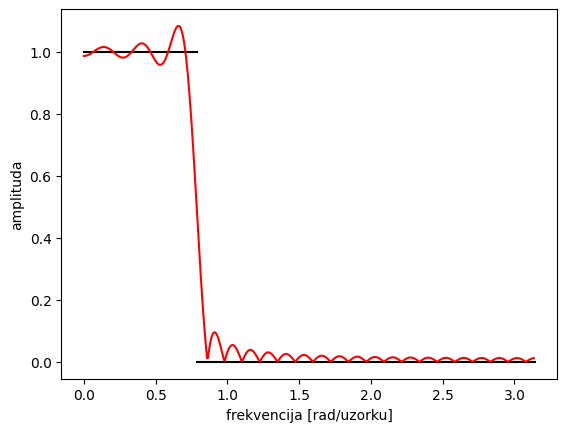

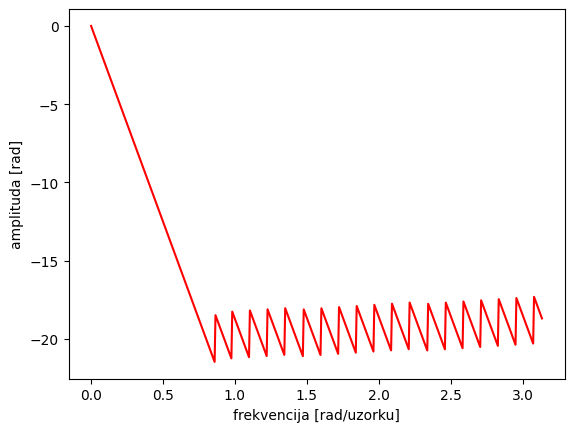

In [71]:
# Postavi red filtra na 50
M = 50;

# Definiraj željenu amplitudnu karakteristiku kao po odsječcima afinu funkciju
F_ls = [0, 0.25, 0.25, 1];
A_ls = [1,    1,    0, 0];

# Nacrtaj željenu amplitudnu karakteristiku u crnoj boji
W_ls = array(F_ls) * pi;
figure(1);
for i in range(0, len(F_ls), 2):
  plot([W_ls[i], W_ls[i+1]], [A_ls[i], A_ls[i+1]] , 'k');

# Metodom najmanjih kvadrata dizajniraj impulsni odziv FIR filtra generalizirane linearne faze
h_ls = firls(M+1, F_ls, A_ls);

# Izračunaj frekvencijsku karakteristiku dizajniranog filtra
W_ls, H_ls = freqz(h_ls);

# Nacrtaj ostvarenu amplitudnu karakteristiku u crvenoj boji
plot(W_ls, abs(H_ls), 'r');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda');

# Nacrtaj ostvarenu faznu karakteristiku u crvenoj boji
figure(2);
plot(W_ls, unwrap(angle(H_ls)), 'r');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda [rad]');

Primijetite da amplitudna karakteristika filtra dizajniranog metodom najamanjih kvadrata iskazuje nadvišenje (i propad koji opet postaje nadvišenje jer crtamo apsolutnu vrijednost) oko točaka prekida (diskontinuiteta) zadane amplitudne karakteristike $A_D(\omega)$. U određenim primjenama nadvišenja (i propadi) su nepoželjni. Također primjetite da razlika između željenog odziva $A_d(\omega)$ i ostvarenog odziva nije jednoliko raspoređena po svim frekvencijama, odnosno iznos grešeke je to veći što smo bliže prekidu i opada kako se udaljemo od prekida. Za dublje objašnjenje ove pojave pročitajte članke o [Gibbsovoj pojavi](https://en.wikipedia.org/wiki/Gibbs_phenomenon) i o [Rungevoj pojavi](https://en.wikipedia.org/wiki/Runge%27s_phenomenon).

VAŽNO: Postupak dizajna filtara pomoću funkcije `firls` koristi neku vrstu inverzije matrice kako bi izračunao parametare filtra što u određenim slučajevima može rezultirati numeričkom nestabilnošću. Stoga se frekvencijska karakteristika proračunatog filtra uvijek mora ponovo izračunati korištenjem funkcije `freqz` te usporediti sa željenom karakteristikom kako smo napravili u ovom primjeru.

## 2.A Dizajniranje NP i VP filtra metodom najmanjih kvadrata

Korištenjem funkcije `firls` dizajnirajte nisko-propusni (NP) i visoko-propusni (VP) FIR filtar generalizirane linearne faze metodom najmanjih kvadrata.

Neka oba filtra imaju istu graničnu frekvenciju $\omega_c={\pi\over2}$ i isti red $N=64$.

Nakon izračuna koeficijenata filtra nacrtajte amplitudnu i faznu frekvencijsku karakteristiku ostvarnenih FIR filtara, i to zajedno na istom grafu te odvojeno na zasebnim grafovima.

Po potrebi slobodno dodajte onoliko polja za upis koda koliko vam treba.

In [72]:
import numpy as np
import matplotlib.pyplot as plt


In [73]:
N = 15
omega_c = np.pi / 2

In [74]:
lp_filter = firls(N, [0, omega_c, omega_c, np.pi], [1, 1, 0, 0], fs=2*np.pi)

In [75]:
hp_filter = firls(N, [0, omega_c, omega_c, np.pi], [0, 0, 1, 1], fs=2*np.pi)


In [76]:
def plot_filter_response(filter_coeffs, title):
    w, h = freqz(filter_coeffs, worN=8000)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(w / np.pi, 20 * np.log10(abs(h)))
    plt.title(title)
    plt.xlabel('Normalizirana frekvencija (×π rad/uzorak)')
    plt.ylabel('Amplituda (dB)')
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.plot(w / np.pi, np.angle(h))
    plt.xlabel('Normalizirana frekvencija (×π rad/uzorak)')
    plt.ylabel('Faza (radijani)')
    plt.grid()
    plt.show()

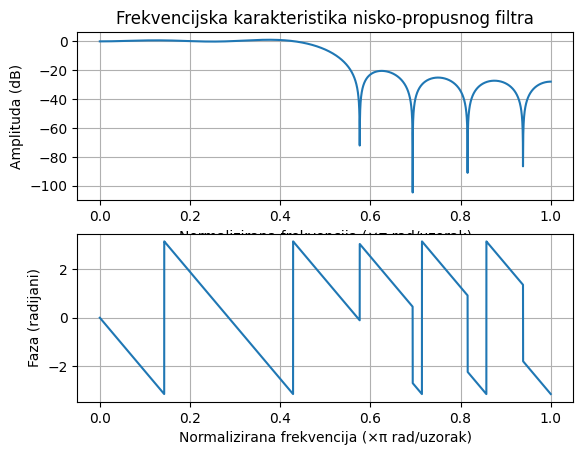

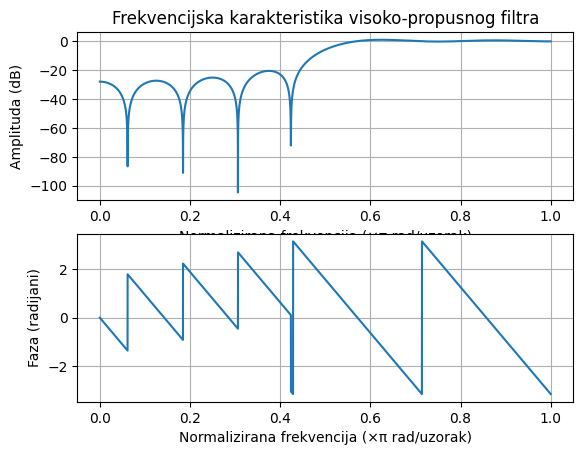

In [77]:
plot_filter_response(lp_filter, 'Frekvencijska karakteristika nisko-propusnog filtra')
plot_filter_response(hp_filter, 'Frekvencijska karakteristika visoko-propusnog filtra')

Nakon što ste dizajnirali dva zadana filtra odgovorite na sljedeća pitanja:

Što se događa s nadvišenjima/propadima oko svakog prekida u amplitudnoj karakteristici kada povećavamo red filtra $N$?

**A:** Kako se povećava red filtra N, nadvišenja i propadi oko svakog prekida u amplitudnoj karakteristici postaju uži i viši. To je zbog Gibbsove pojave koja se pojačava s povećanjem reda filtra.

Možete li predložiti neki postupak za smanjenje nadvišenja/propada? Ako možete, onda objasnite vaše razmišljanje!

**A:** Korištenje prozorskih funkcija (Hammingov prozor) prilikom dizajniranja filtra, uz pretpostavku da tako smanjimo Gibbsovu pojavu tako što glatko smanjuju koeficijente filtra prema krajevima -> to dovodi do smanjenja oscilacija u frekvencijskoj karakteristici.

Označimo s $H_{LP}(z)$ prijenosnu funkciju nisko-propusnog filtra i s $H_{HP}(z)$ prijenosnu funkciju visoko-propusnog filtra. Koja je prijenosna funkcija filtra nastalog paralelnim spojem ova dva navedena filtra, odnosno koliko iznosi $H_{LP}(z)+H_{HP}(z)$?

**A:** Prijenosna funkcija  je H_{LP}(z) + $H_{HP}(z)$. Ako su oba filtra idealna, uz istu graničnu frekvenciju, tada je $H_{LP}(z) + H_{HP}(z) = 1$ za sve frekvencije. 
Razog je da nisko propusni filtar propušta niske frekvencije, a visoko propusni filtar propušta visoke frekvencije te tako zajedno pokrivaju cijeli frekvencijski spektar. 

# 3. Dizajniranje FIR filtra generalizirane linearne faze metodom minimizacije maksimalnog odstupanja (minimaks)

Minimizacija maksimalnog odstupanja znači da smo parametar $p$ postavili u beskonačnost, odnosno $p\to+\infty$, i zato često kažemo da tražimo rješenje minimizacijskog problema u normi beskonačno.

Želimo minimizirati grešku

$$E=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_\infty=\lim_{p\to\infty}\sqrt[p]{\int_{-\pi}^{+\pi}\bigl|D(\omega)-H(e^{j\omega})\bigr|^p\,d\omega}=\max_{\omega\in\langle-\pi,\pi\rangle}\,\bigl|D(\omega)-H(e^{j\omega})\bigr|,$$

gdje je član $H(e^{j\omega})$ ograničen na neku od frekvencijskih karakteristika filtara tipa I-IV koje smo već ranije naveli i gdje je član $D(\omega)$ takav da sadrži neku unaprijed zadanu amplitudu karakteristiku $A_D(\omega)$ dok je željena faza $\phi_D(\omega)$ jednaka fazi odabranog filtra tipa I-IV.

Kako za $p\to+\infty$ u navedenom izrazu počinje dominirati najveća razlika između $D(\omega)$ i $H(e^{j\omega})$ efekitvno minimiziramo maksimalno odstupanje pa zato često kažemo da radimo **minimaks** optimizaciju.

Na primjer, za FIR filtar generalizirane linearne faze tipa I je

$$
H(e^{j\omega})=e^{-jM\omega/2}\Bigl(h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\Bigr)
$$

i

$$\phi_D(\omega)=-M\omega/2$$

što znači da minimiziramo izraz

\begin{align}
E=\bigl|\bigl|D(\omega)-H(e^{j\omega})\bigr|\bigr|_\infty
&=\max_{\omega\in\langle-\pi,\pi\rangle}\,\bigl|D(\omega)-H(e^{j\omega})\bigr|\\
&=\max_{\omega\in\langle-\pi,\pi\rangle}\,\biggl|A_D(\omega)e^{j\phi_D(\omega)}-e^{-jM\omega/2}\Bigl(h[{\textstyle {M\over 2}}]+\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\Bigr)\biggr|\\
&=\max_{\omega\in\langle-\pi,\pi\rangle}\,|e^{-jM\omega/2}|\biggl|A_D(\omega)-h[{\textstyle {M\over 2}}]-\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\biggr|\\
&=\max_{\omega\in\langle-\pi,\pi\rangle}\,\biggl|A_D(\omega)-h[{\textstyle {M\over 2}}]-\sum_{m=1}^{M/2}2h\bigl[{\textstyle {M\over 2}}-m\bigr]\cos(\omega m)\biggr|.
\end{align}

Greška $E$ koju minimiziramo jest maksimalna razlika između željenog odziva $A_D(\omega)$ i $H(e^{j\omega})$. Pripadna funkcija greške se ponekad naziva Čebišovljevom funkcijom greške jer je rješenje minimaks problema povezano s Čebišovljevim polinomima. Važno je uočiti da ostvarena minimalna vrijednost greške $E$ odozgo ograničava maksimalnu razliku ili odstupanje između željene i ostvarene amplitudne karakteristike za razliku od metode najmanjih kvadrata gdje je $E$ je energija greške koja uopće ne ograničava maksimalno odstupanje. Zbog toga kažemo da je metoda minimaksa robusna metoda dizajniranja filtara.

Opisani postupak minimizacije je rješiv, a rješenje je iterativni postupak koji brzo konvergira. Rješenje je prvi put opisano od strane T. Parksa i J. McClellana 1972. godine ([https://doi.org/10.1109/TCT.1972.1083419](https://doi.org/10.1109/TCT.1972.1083419)) i koristi [Remezov algoritam](https://en.wikipedia.org/wiki/Remez_algorithm) za određivanje minimuma. Izvod postupka je nešto složeniji u odnosu na izvod metode najmanjih kvadrata, a uz to je i tehnički naporan jer uvodi univerzalnu supstituciju kako bi sva četiri tipa filtra sveo na isto. Zbog toga ga izostavljamo te studente koji žele znati više upućujemo na Parksom i McClellanov članak ili na bilo koju drugu literaturu o dizajnu digitalnih filtara.

Parksov i McClellanov postupak dizajniranja digitalnih filtara implementiran je funkcijom `remez` u SciPyju ([`scipy.signal.remez`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html)) i funkcijom `firpm` u Matlabu ([`firpm`](https://www.mathworks.com/help/signal/ref/firpm.html)). Funkcija `remez` trenutno također radi u Matlabu, no može biti uklonjena u budućnosti.

Sintaksa funkcija `remez` i `firpm` jako je slična sintaksi funkcije `firls` pa ćemo samo navesti bitne razlike.

Najznačajnija razlika koja je posljedica minimaks optimizacijskog postupka jest ta da između svaka dva susjedna afina odsječka uvijek mora postojati prijelazno područje, odnosno normalizirane frekvencije $F_k$ su sada nužno rastuće te za njih vrijedi

$$0\le F_0<F_1< F_2<F_3<\cdots< F_{2i}<F_{2i+1}<\cdots\le F_S/2,$$

gdje $F_S/2$ opet predstavlja normaliziranu vrijednost točno na pola frekvencije očitavanja (standardni odabir je $F_S=2$). Drugim riječima rečeno, moramo dodati prijelazno područje ili konačni razmak između svaka dva susjedna afina odsječka. Ubačena prijelazna područja ne smiju biti preuska; kao početnu vrijednost dobro je odabrati prijelazna područja širine oko $\pi/M$.

Osim toga implementacija u SciPyju je ograničena je na konstantne vrijednosti afinih odsječaka pa je dozvoljeno zadati samo jednu željenu amplitudu za svaki odsječak. To znači da je niz `A` točno pola duljine od `F`. Dodatna komplikacija jest postupak normalizacije frekvencije kojeg su u SciPyju za funkciju `remez` defnirali s $F_k=\omega/(2\pi)$ tako da je $F_S/2=0.5$ umjesto $F_S=2$. To znači da kod poziva funkcije `remez` u SciPyju zadane frekvencije $F_k$ započinju od nule i završavaju u jednoj polovini umjesto u jedan.

U Matlabu nema takvih razlika obzirom na ulazne parametre funkcije, dakle funkcije `firls` i `firpm` koriste apsolutno iste speficikaciju za svoje ulazne parametre. Dodatno, funkcija `firpm` u Matlabu podržava po odsječicma afinu funkciju te nije ograničena na način da vrijednost svako odsječka mora biti konstanta.

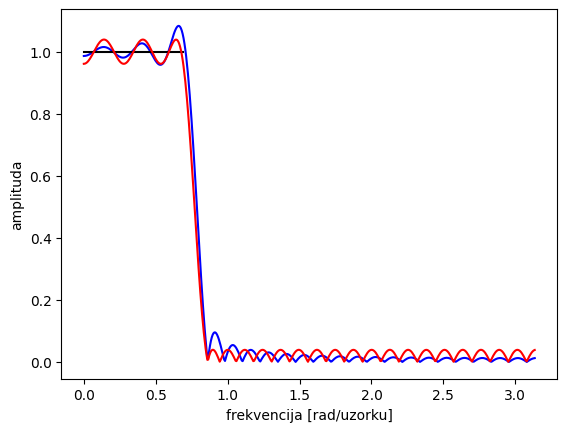

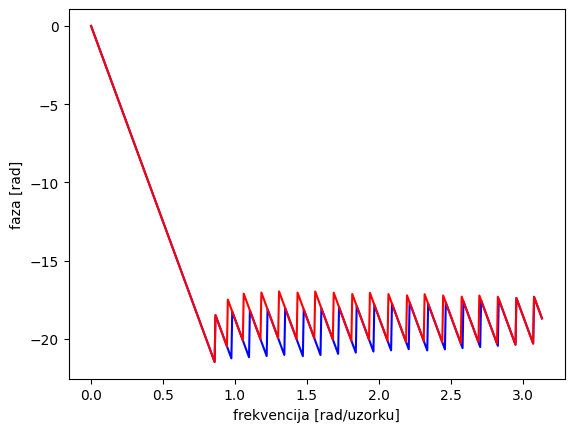

In [78]:
# Postavi red filtra na 50
M = 50;

# Definiraj željenu amplitudnu karakterisitku kao po odsječcima konstantnu funkciju
F_pm = [0, 0.22/2, 0.27/2, 1/2];
A_pm = [1, 0];

# Prvo radi usporedbe nacrtaj filtre ostvarene metodom najmanjih kvadrata tako da su grafovi najdonji
figure(1)
plot(W_ls, abs(H_ls), 'b');
figure(2)
plot(W_ls, unwrap(angle(H_ls)), 'b');

# Nacrtaj željenu amplitudnu karakteristiku u crnoj boji
W_pm = array(F_pm) * 2 * pi;
figure(1);
for i in range(0, len(A_pm)-1, 1):
  plot([W_pm[2*i], W_pm[2*i+1]], [A_pm[i], A_pm[i]] , 'k');

# Metodom minimaksa dizajniraj impulsni odziv FIR filtra generalizirane linearne faze
h_pm = remez(M+1, F_pm, A_pm);

# Izračunaj frekvencijsku karakteristiku ostvarenog filtra
W_pm, H_pm = freqz(h_pm);

# Nacrtaj ostvarenu amplitudnu karakteristiku u crvenoj boji
figure(1)
plot(W_pm, abs(H_pm), 'r');
xlabel('frekvencija [rad/uzorku]');
ylabel('amplituda');

# Nacrtaj ostvarenu faznu karakteristiku u crvenoj boji
figure(2);
plot(W_pm, unwrap(angle(H_pm)), 'r');
xlabel('frekvencija [rad/uzorku]');
ylabel('faza [rad]');

Primijetite da amplitudna karakteristika dizajniranog minimaks filtra iskazuje jednolika periodička odstupanja od željene karakteristike pa se takvi filtri zovi i filtri **jednolike valovitosti** (engl. *equiripple*).

Kako minimiziramo maksimalnu pogrešku za fiksirani red filtra $M$ i za fiksiranu željenu amplitudnu karakteristiku filtar **jednolike valovitosti** će uvijek imati **manje** maksimalno odstupanja od željene karakteristike u odnosu na filtar ostvaren metodom najmanjih kvadrata. To se postiže zato jer je greška kod filtra jednolike valovitosti raspoređena kroz sve frekvencije, a kod filtra najmanjih kvadrata greška je koncentrirana u području oko prekida ili diskontinuiteta. 

VAŽNO: Postupak dizajna filtara pomoću funkcija `remez` i `firpm` koristi neku vrstu inverzije matrice kako bi izračunao parametare filtra što u određenim slučajevima može rezultirati numeričkom nestabilnošću. Stoga se frekvencijska karakteristika proračunatog filtra uvijek mora ponovo izračunati korištenjem funkcije `freqz` te usporediti s željenom karakteristikom.

# 3.A Dizajniranje NP i VP filtra metodom minimaksa

Korištenjem funkcije `remez` dizajnirajte nisko-propusni i visoko-propusni FIR filtar generalizirane linearne faze metodom minimaksa.

Neka oba filtra imaju istu graničnu frekvenciju $\omega_c={\pi\over2}$ i isti red $N=64$.

Nakon izračuna koeficijenata filtra nacrtajte amplitudnu i faznu frekvencijsku karakteristiku ostvarnenih FIR filtara, i to zajedno na istom grafu te odvojeno na zasebnim grafovima.

Po potrebi slobodno dodajte onoliko polja za upis koda koliko vam treba.

In [79]:
N = 64
omega_c = np.pi / 2  

In [80]:
lp_filter_remez = remez(N + 1, [0, omega_c - 0.1, omega_c + 0.1, np.pi], [1, 0], fs=2*np.pi)

In [88]:
hp_filter_remez = remez(N + 1, [0, omega_c - 0.1, omega_c + 0.1, np.pi], [0, 1], fs=2*np.pi)

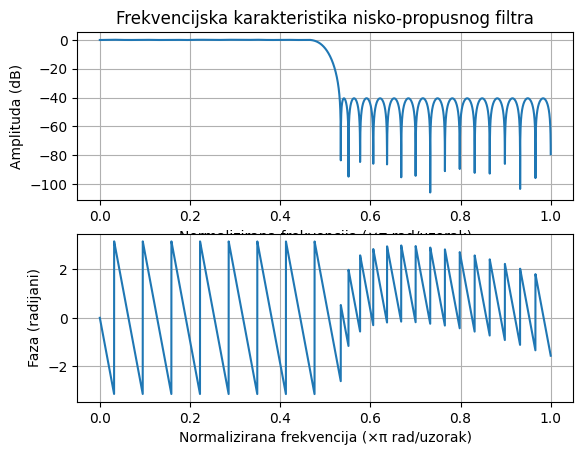

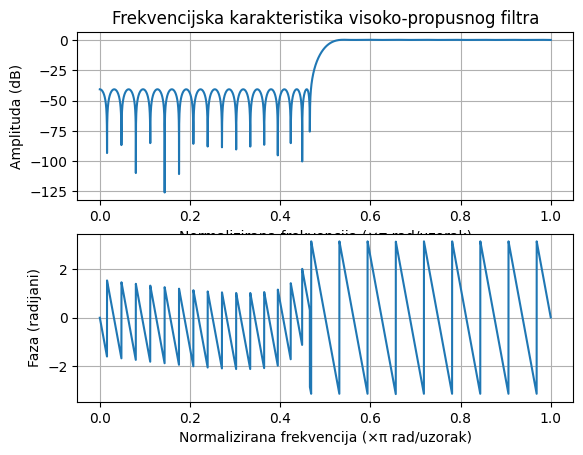

In [89]:
plot_filter_response(lp_filter_remez, 'Frekvencijska karakteristika nisko-propusnog filtra')
plot_filter_response(hp_filter_remez, 'Frekvencijska karakteristika visoko-propusnog filtra')


In [90]:
def plot_combined_response(lp_filter, hp_filter):
    w_lp, h_lp = freqz(lp_filter, worN=8000)
    w_hp, h_hp = freqz(hp_filter, worN=8000)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(w_lp / np.pi, 20 * np.log10(abs(h_lp)), label='Nisko-propusni')
    plt.plot(w_hp / np.pi, 20 * np.log10(abs(h_hp)), label='Visoko-propusni')
    plt.title('Frekvencijska karakteristika nisko-propusnog i visoko-propusnog filtra')
    plt.xlabel('Normalizirana frekvencija (×π rad/uzorak)')
    plt.ylabel('Amplituda (dB)')
    plt.legend()
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.plot(w_lp / np.pi, np.angle(h_lp), label='Nisko-propusni')
    plt.plot(w_hp / np.pi, np.angle(h_hp), label='Visoko-propusni')
    plt.xlabel('Normalizirana frekvencija (×π rad/uzorak)')
    plt.ylabel('Faza (radijani)')
    plt.legend()
    plt.grid()
    plt.show()

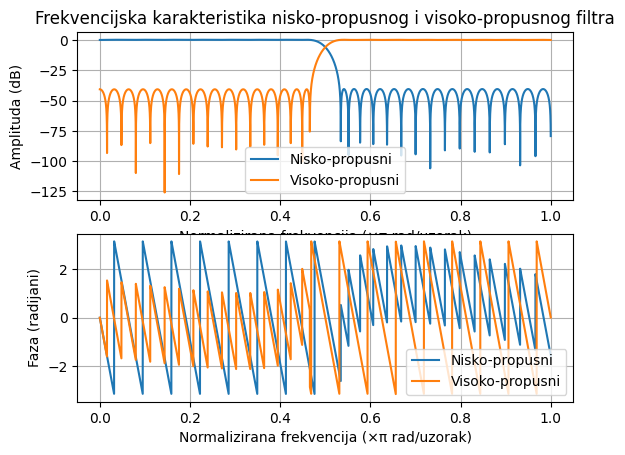

In [91]:
plot_combined_response(lp_filter_remez, hp_filter_remez)

Nakon što ste dizajnirali dva zadana filtra odgovorite na sljedeća pitanja:

Što se događa s amplitudom jednolike valovitosti (iznosom maksimalne greške) ako suzimo prijelazno područje, a što ako ga proširimo?

**A:** Ako suzimo, amplituda jednolike valovitosti (maksimalna greška) se povećava jer filtar mora napraviti oštriji prijelaz između propusnog i zaustavnog pojasa, a ako proširim, amplituda se smanjuje jer filtar ima više prostora za glatki prijelaz.

## 4. Položaj nula

Svaki digitalni filtar u potpunosti je opisan položajem vlastitih polova i nula.

FIR filtri nemaju ne-trivijalnih polova što znači da samo nule utječu na njihovu frekvencijsku karakteristiku. Prema tome kod FIR filtara nas zanima isključivo položaj vlastitih nula.

Znamo da ako je impulsni odziv realan onda su nule digitalnog filtra ili čisto realne ili su sparene u konjugirano-kompleksne parove.

Također, nula filtra postavljena na jediničnu kružnicu $z=e^{j\omega}$ na frekvenciju $\omega_0$ uzrokuje da amplitudna karakteristika na $\omega_0$ postane jednaka nuli. U tom slučaju kažemo da filtar u potpunosti **zatire** odabranu frekvenciju.

## 4.1. Položaj nula kod FIR filtara generalizirane linearne faze

Kod određivanja položaja nula od posebnog interesa su FIR filtri generalizirane linearne faze. Impulsni odziv tih filtara zadovoljava svojstvo simetrije ili antisimetrije,

$$h[n]=\pm h[M-n].$$

Gore navedeno svojstvo impulsnog odziva omogućava nam da prijenosnu funkcija filtra izrazimo na dva različita načina,

$$H(z)=\sum_{n=0}^{M}h[n]z^{-n}=\sum_{n=0}^{M}\pm h[M-n]z^{-n}.$$

Zamjena varijable $m=M-n$ sada daje

$$H(z)=\sum_{n=0}^{M}\pm h[M-n]z^{-n}=\sum_{m=0}^{M}\pm h[m]z^{-M+m}=z^{-M}\sum_{m=0}^{M}\pm h[m]z^{m}.$$

Također vrijedi

$$\sum_{m=0}^{M}h[m]z^{m}=H(z^{-1}),$$

pa na kraju dobivamo

$$H(z)=\pm z^{-M}H(z^{-1}).$$

Polinome $H(z)$ s realnim koeficijentima koji zadovoljavu gore navedene uvjete obično zovemo polinomima sa zrcalnim koeficijentima. U engleskoj literaturi se još preciznije koriste izrazi **mirror-image polynomial** i **antimirror-image polynomial**.

Za takav polinom vrijedi da ako je $z_0$ njegova nula onda je i $1/z_0$ također njegova nula.

To svojstvo proizlazi odmah iz $H(z)=\pm z^{-M}H(z^{-1})$ jer za $z_0\neq 0$ imamo $H(z_0)=0=z_0^{-M}H(z_0^{-1})$ što vrijedi samo ako je $H(z_0^{-1})=0$.

Navedeno ograničenje položaja nula FIR filtra linearne faze je očekivano obzirom na to da simetrija ili antisimetrija pripadajućeg impulsnog odziva smanjuje broj stupnjeve slobode u optimizacijskom problemu na pola. Prema tome kada bi dizajnirali takve filtre korištenjem reprezentacije preko nula, polova i pojačanja onda je samo dio nula slobodno raspoređen i podložan optimizaciji, a preostale nule su unaprijed ograničene uvjetima koji ih sparuju u konjugirano-kompleksne i u recipročne parove.


## 4. Položaj nula kod pojasnog propusta i kod pojasne brane

Skicirajte položaje nula za sva četiri prethodno dizajnirana FIR filtra generalizirane linearne faze.

Položaje nula za svaki od filtara nacrtajte na novoj slici.

Uputa: Iskoristite kod pripremljen za drugu laboratorijsku vježbu.

**VAŽNO:** Nule FIR filtra generalizirane linearne faze su konjugirano-kompleksne i recipročne s obzirom na jediničnu kružnicu, odnosno povezane su izrazima $re^{\pm j\phi}$ i $r^{-1}e^{\pm j\phi}$ (pogledaj tekst o polinomima sa zrcalnim koeficijentima). Prema tome svaka nula s neiščežavajućim imaginarnim dijelom određuje još do najviše tri nule sukladno recipročnosti i konjugirano-kompleksnosti, a čisto realne nula određuje samo svoj recipročni par (osim ako je točno u $\pm1$).

**VAŽNO:** Dva filtra s graničnom frekvencijom $\pi/2$ koja ste dizajnirali u ovoj laboratorijskoj vježbom mogu uzrokovati numeričku nestabilnost u funkciji `roots` za numeričko računanje korjena polinoma. Ako pri skiciranju položaja nula dobiveni položaji nemaju smisla obzirom na dobivenu amplitudnu karakteristiku, dakle ako nema nula na jediničnoj kružnici i ako nema konjugirano-kompleksnih i recipročnih parova nula, tada zaokružite koeficijente impulsnog odziva koji su bliski nuli s razlikom reda veličine `numpy.finfo(float).eps` na nulu kako bi stabilizirali rezultat funkcije `roots`.

Obzirom na navedeni numerički problem imajte u vidu da postupak numeričkog dizajniranja nekih filtra računalom korištenjem funkcija opisanih u ovoj vježbi postaje gotovo pa nemoguć kada red filtra pređe specifičnu vrijednost koja ovisi o numeričkoj preciznosti računala koje se koristi za projektiranje.

&nbsp;

Po potrebi slobodno dodajte onoliko polja za upis koda koliko vam treba.

In [92]:
def plot_zeros(filter_coeffs, title):
   roots = np.roots(filter_coeffs)
   
   plt.figure()
   plt.plot(np.cos(np.linspace(0, 2*np.pi, 1000)), np.sin(np.linspace(0, 2*np.pi, 1000)), 'k--')
   
   plt.scatter(np.real(roots), np.imag(roots), color='red', marker='o')
   
   plt.xlim([-1.5, 1.5])
   plt.ylim([-1.5, 1.5])
   plt.xlabel('Realni dio')
   plt.ylabel('Imaginarni dio ')
   plt.title(title)
   plt.grid()
   plt.gca().set_aspect('equal', adjustable='box')
   plt.show()

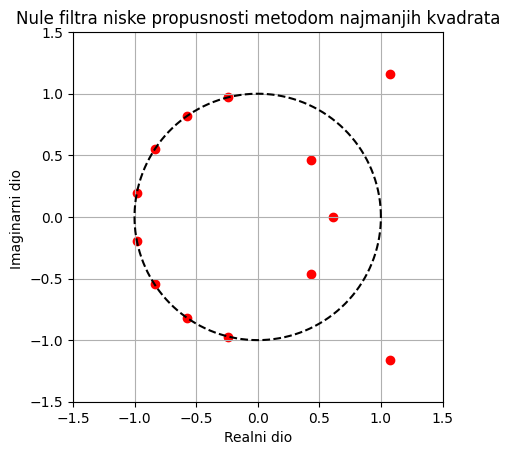

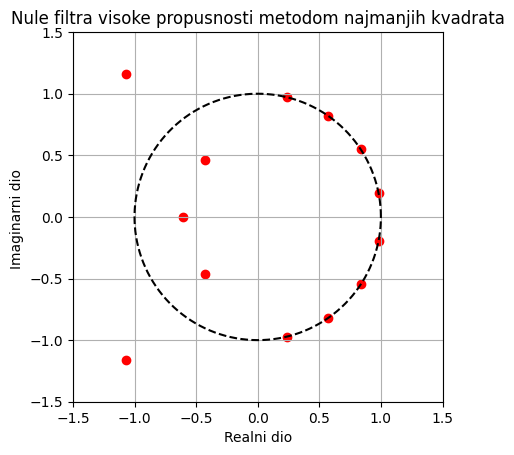

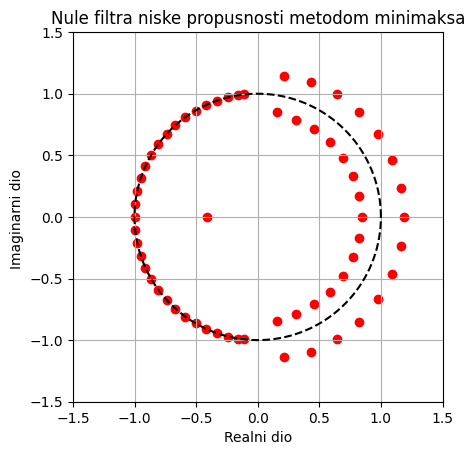

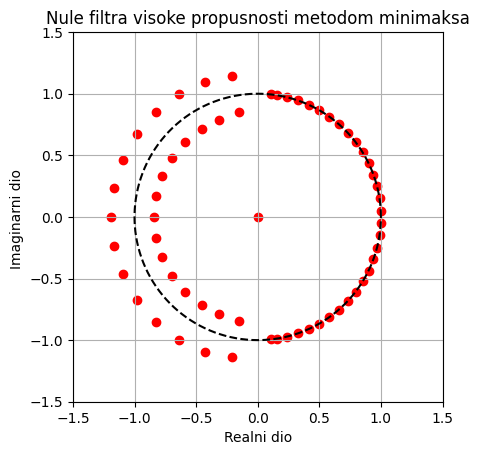

In [93]:
plot_zeros(lp_filter, 'Nule filtra niske propusnosti metodom najmanjih kvadrata')
plot_zeros(hp_filter, 'Nule filtra visoke propusnosti metodom najmanjih kvadrata')
plot_zeros(lp_filter_remez, 'Nule filtra niske propusnosti metodom minimaksa')
plot_zeros(hp_filter_remez, 'Nule filtra visoke propusnosti metodom minimaksa')

Kada ste nacrtali sva položaj nula za sva četiri dizajnirana filtra odgovorite na sljedeće pitanje:

Što možete reći o položaju nula za pojas frekvencija u kojem filtar propušta, a što za pojas frekvencija u kojem filtar guši signal? U kojem od ta dva pojasa su nule točno na jediničnoj kružnici?

**A:** Za pojas frekvencija u kojem filtar propušta, nule se ne nalaze na jediničnoj kružnici na tim frekvencijama, već su udaljene od nje kako bi omogućile visok prijenos signala., ali ne na frekvencijama koje se propuštaju. Za pojas frekvencija u kojem filtar guši signal, nule su točno na jediničnoj kružnici. 

Nule su točno na jediničnoj kružnici u pojasu frekvencija u kojem filtar guši signal.